In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
eski_filmler = pd.read_csv("TMDb_updated.csv", low_memory=False)  # DtypeWarning kapamak icin


In [2]:
eski_filmler.head()

,Unnamed: 0,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [3]:
eski_filmler.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
eski_filmler.shape

(10000, 5)

In [5]:
eski_filmler.isnull().values.any()

True

In [6]:
eski_filmler.isnull().sum()

title                 0
overview             30
original_language     0
vote_count            0
vote_average          0
dtype: int64

In [7]:
eski_filmler=eski_filmler.sort_values(by=['vote_count'], ascending=False)
eski_filmler.head()

,title,overview,original_language,vote_count,vote_average
80,Inception,"Cobb, a skilled thief who commits corporate es...",en,25148,8.3
128,Deadpool,Deadpool tells the origin story of former Spec...,en,22225,7.6
86,The Avengers,When an unexpected enemy emerges and threatens...,en,21893,7.7
47,Interstellar,Interstellar chronicles the adventures of a gr...,en,21589,8.3
88,The Dark Knight,Batman raises the stakes in his war on crime. ...,en,21561,8.4


In [8]:
eski_filmler['overview'] = eski_filmler['overview'].fillna('')

In [9]:
eski_filmler.isnull().sum()

title                0
overview             0
original_language    0
vote_count           0
vote_average         0
dtype: int64

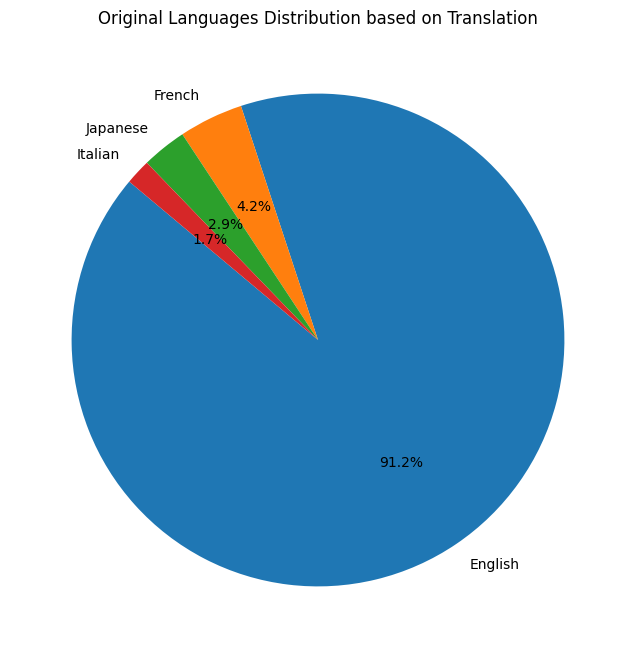

In [10]:
# Dil çevirisi
language_translation = {"en": "English", "fr": "French", "ja": "Japanese", "it": "Italian"}

# 'original_language' sütununu çevir
eski_filmler['language'] = eski_filmler['original_language'].map(language_translation)

# Dil çevirisi yapılmış sütuna göre daire grafiği oluştur
language_counts = eski_filmler['language'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Original Languages Distribution based on Translation')
plt.show()

In [11]:

 filmler_2023= pd.read_excel("film_bilgileri .xlsx")


In [12]:
filmler_2023.head()

,Rank,Film Adı,Tür,Açıklama,vote_average
0,1,Spider-Man: Across the Spider-Verse,"Animation, Action, Adventure","Miles Morales catapults across the multiverse,...",8.6
1,2,Poor Things,"Comedy, Drama, Romance",The incredible tale about the fantastical evol...,8.5
2,3,Gojira -1.0,"Action, Adventure, Drama",Post war Japan is at its lowest point when a n...,8.4
3,4,Oppenheimer,"Biography, Drama, History",The story of American scientist J. Robert Oppe...,8.4
4,5,Taylor Swift: The Eras Tour,"Documentary, Music","Experience the Eras Tour concert, performed by...",8.2


In [13]:
# Yıl değişkenini ekleyelim ve tüm değerleri 2023 öncesi yapalım
eski_filmler['Yıl'] = '2023 öncesi'

In [14]:
eski_filmler.head()

,title,overview,original_language,vote_count,vote_average,language,Yıl
80,Inception,"Cobb, a skilled thief who commits corporate es...",en,25148,8.3,English,2023 öncesi
128,Deadpool,Deadpool tells the origin story of former Spec...,en,22225,7.6,English,2023 öncesi
86,The Avengers,When an unexpected enemy emerges and threatens...,en,21893,7.7,English,2023 öncesi
47,Interstellar,Interstellar chronicles the adventures of a gr...,en,21589,8.3,English,2023 öncesi
88,The Dark Knight,Batman raises the stakes in his war on crime. ...,en,21561,8.4,English,2023 öncesi


In [15]:
filmler_2023['Yıl']='2023'

In [16]:
filmler_2023.head()

,Rank,Film Adı,Tür,Açıklama,vote_average,Yıl
0,1,Spider-Man: Across the Spider-Verse,"Animation, Action, Adventure","Miles Morales catapults across the multiverse,...",8.6,2023
1,2,Poor Things,"Comedy, Drama, Romance",The incredible tale about the fantastical evol...,8.5,2023
2,3,Gojira -1.0,"Action, Adventure, Drama",Post war Japan is at its lowest point when a n...,8.4,2023
3,4,Oppenheimer,"Biography, Drama, History",The story of American scientist J. Robert Oppe...,8.4,2023
4,5,Taylor Swift: The Eras Tour,"Documentary, Music","Experience the Eras Tour concert, performed by...",8.2,2023


In [17]:
filmler_2023 =filmler_2023.rename(columns={'Film Adı': 'title', 'Açıklama': 'overview'})


In [18]:
filmler_2023.head()

,Rank,title,Tür,overview,vote_average,Yıl
0,1,Spider-Man: Across the Spider-Verse,"Animation, Action, Adventure","Miles Morales catapults across the multiverse,...",8.6,2023
1,2,Poor Things,"Comedy, Drama, Romance",The incredible tale about the fantastical evol...,8.5,2023
2,3,Gojira -1.0,"Action, Adventure, Drama",Post war Japan is at its lowest point when a n...,8.4,2023
3,4,Oppenheimer,"Biography, Drama, History",The story of American scientist J. Robert Oppe...,8.4,2023
4,5,Taylor Swift: The Eras Tour,"Documentary, Music","Experience the Eras Tour concert, performed by...",8.2,2023


In [19]:
filmler_2023.drop(['Rank', 'Tür'], axis=1, inplace=True)
eski_filmler.drop(['original_language', 'vote_count', 'language'], axis=1, inplace=True)

In [20]:
birlesik_veri_seti = pd.merge(eski_filmler, filmler_2023, on='title', how='outer')

In [21]:
result_df = pd.concat([eski_filmler, filmler_2023], ignore_index=True)

In [22]:
result_df.head()

,title,overview,vote_average,Yıl
0,Inception,"Cobb, a skilled thief who commits corporate es...",8.3,2023 öncesi
1,Deadpool,Deadpool tells the origin story of former Spec...,7.6,2023 öncesi
2,The Avengers,When an unexpected enemy emerges and threatens...,7.7,2023 öncesi
3,Interstellar,Interstellar chronicles the adventures of a gr...,8.3,2023 öncesi
4,The Dark Knight,Batman raises the stakes in his war on crime. ...,8.4,2023 öncesi


In [23]:
result_df.tail()

,title,overview,vote_average,Yıl
10095,Hypnotic,A detective investigates a mystery involving h...,5.5,2023
10096,Inside,"Nemo, a high-end art thief, is trapped in a Ne...",5.5,2023
10097,Perfect Addiction,A successful boxing trainer discovers that her...,5.5,2023
10098,Meg 2: The Trench,A research team encounters multiple threats wh...,5.0,2023
10099,Clock,A woman enrolls in a clinical trial to try and...,5.0,2023


In [24]:
result_df[result_df['Yıl'] == "2023"]

,title,overview,vote_average,Yıl
10000,Spider-Man: Across the Spider-Verse,"Miles Morales catapults across the multiverse,...",8.6,2023
10001,Poor Things,The incredible tale about the fantastical evol...,8.5,2023
10002,Gojira -1.0,Post war Japan is at its lowest point when a n...,8.4,2023
10003,Oppenheimer,The story of American scientist J. Robert Oppe...,8.4,2023
10004,Taylor Swift: The Eras Tour,"Experience the Eras Tour concert, performed by...",8.2,2023
...,...,...,...,...
10095,Hypnotic,A detective investigates a mystery involving h...,5.5,2023
10096,Inside,"Nemo, a high-end art thief, is trapped in a Ne...",5.5,2023
10097,Perfect Addiction,A successful boxing trainer discovers that her...,5.5,2023
10098,Meg 2: The Trench,A research team encounters multiple threats wh...,5.0,2023


In [25]:
result_df.dtypes

title            object
overview         object
vote_average    float64
Yıl              object
dtype: object

In [26]:
result_df.isnull().sum()


title           0
overview        0
vote_average    0
Yıl             0
dtype: int64

# 1. TF-IDF Matrisinin Oluşturulması

In [27]:
tfidf = TfidfVectorizer(stop_words="english")
# Ölçüm değeri taşımayan kelimleri veri setinden çıkarır.

In [28]:
# "title" ve "overview" sütunlarını birleştirerek bir metin sütunu oluştur
result_df['combined_text'] = result_df['title'] + ' ' + result_df['overview']

# TF-IDF vektörleme işlemini gerçekleştir
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(result_df['combined_text'])


In [29]:
# tfidf_matrix = tfidf.fit_transform(result_df['overview'])

In [30]:
tfidf_matrix.shape

(10100, 30372)

In [31]:
tfidf.get_feature_names_out()


array(['00', '000', '006', ..., 'как', 'смотри', '運轉手之戀'], dtype=object)

In [32]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 2. Cosine Similarity Matrisinin Oluşturulması

In [33]:
cosine_sim = cosine_similarity(tfidf_matrix,
                               tfidf_matrix)

In [34]:
cosine_sim.shape

(10100, 10100)

# 3. Benzerliklere Göre Önerilerin Yapılması

In [35]:
indices = pd.Series(result_df.index, index=result_df['title'])

In [36]:
indices.index.value_counts()

title
Beauty and the Beast    4
Dracula                 4
The Vanishing           3
The Little Mermaid      3
Halloween               3
                       ..
Timecrimes              1
Lemonade Mouth          1
Son of Saul             1
Seeking Justice         1
Clock                   1
Name: count, Length: 9780, dtype: int64

In [37]:
indices = indices[~indices.index.duplicated(keep='last')]

In [38]:
indices.index.value_counts()

title
Inception               1
Freeway                 1
Recess: School's Out    1
The Breed               1
Rock the Kasbah         1
                       ..
The Dirty Dozen         1
Burning                 1
A Long Way Down         1
The Dark Crystal        1
Clock                   1
Name: count, Length: 9780, dtype: int64

In [39]:
indices["The Dirty Dozen"]

3460

In [40]:
movie_index = indices["Oppenheimer"]

In [41]:
cosine_sim[movie_index]

array([0.        , 0.00997887, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [42]:
similarity_scores = pd.DataFrame(cosine_sim[movie_index],
                                 columns=["score"])

In [43]:
movie_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index

In [44]:
result_df['title'].iloc[movie_indices] 

10002              Gojira -1.0
5035     The War of the Worlds
5875        They Came Together
6516      How the West Was Won
697            The Hurt Locker
3933       Blast from the Past
6620          Inherit the Wind
5323                      Igor
5840                Blown Away
4529                     Proof
Name: title, dtype: object

In [45]:
# movie_indices içindeki indeks değerleri 9999 ve üzerinde olan filmleri seç
selected_indices = result_df['title'].iloc[movie_indices].index

# 9999'dan büyük olan bir indeks varsa, o indeksi yazdır
selected_index = next((index for index in selected_indices if index > 9999), None)

if selected_index is not None:
    # Eğer seçilen filmler varsa, sadece 9999'dan büyük olan indeksi yazdır
    print(f"2023 yılında size önerilen film: {result_df['title'].iloc[selected_index]}")
else:
    # Eğer seçilen filmler yoksa, uygun film bulunamadığına dair bir mesajı ekrana basar
    print("2023 yılında size uygun film bulunamadı.")


2023 yılında size önerilen film: Gojira -1.0


# 4. İşlemlerin Fonksiyonlaştırılması

In [46]:
def calculate_cosine_sim(dataframe):
    tfidf = TfidfVectorizer(stop_words='english')
    # "title" ve "overview" sütunlarını birleştirerek bir metin sütunu oluştur
    result_df['combined_text'] = result_df['title'] + ' ' + result_df['overview']

    # TF-IDF vektörleme işlemini gerçekleştir
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(result_df['combined_text'])

    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim

In [47]:

def content_based_recommender_2023(title, cosine_sim, dataframe):
    # index'leri oluşturma
    indices = pd.Series(dataframe.index, index=dataframe['title'])
    indices = indices[~indices.index.duplicated(keep='last')]
    
    # title'ın index'ini yakalama
    movie_index = indices[title]
    
    # title'a göre benzerlik skorlarını hesaplama
    similarity_scores = pd.DataFrame(cosine_sim[movie_index], columns=["score"])
    
    # kendisi hariç ilk 10 filmi getirme
    movie_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index
    
    # movie_indices içindeki indeks değerleri 9999 ve üzerinde olan filmleri seç
    selected_indices = dataframe['title'].iloc[movie_indices].index[1:11]

    # 9999'dan büyük olan bir indeks varsa, o indeksi yazdır
    selected_index = next((index for index in selected_indices if index > 9999), None)

    if selected_index is not None:
        # Eğer seçilen filmler varsa, sadece 9999'dan büyük olan indeksi yazdır
        recommended_movie_title = dataframe['title'].iloc[selected_index]
        print(f"2023 yılında size önerilen film: {recommended_movie_title}")
        return recommended_movie_title
    else:
        # Eğer seçilen filmler yoksa, uygun film bulunamadığına dair bir mesajı ekrana basar
        print("2023 yılında size uygun film bulunamadı.")
        return None



In [48]:
def content_based_recommender_2023(title, cosine_sim, dataframe):
    # index'leri oluşturma
    indices = pd.Series(dataframe.index, index=dataframe['title'])
    indices = indices[~indices.index.duplicated(keep='last')]
    
    # title'ın index'ini yakalama
    movie_index = indices[title]
    
    # title'a göre benzerlik skorlarını hesaplama
    similarity_scores = pd.DataFrame(cosine_sim[movie_index], columns=["score"])
    
    # kendisi hariç ilk 10 filmi getirme
    movie_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index
    
    # movie_indices içindeki indeks değerleri 9999 ve üzerinde olan filmleri seç
    selected_indices = dataframe['title'].iloc[movie_indices].index[1:11]

    # 9999'dan büyük olan indeksleri bulma
    high_indices = [index for index in selected_indices if index > 9999]

    # Eğer 9999'dan büyük olan indeks varsa, filmleri yazdır
    if high_indices:
        print("2023 yılında size önerilen filmler:")
        for index in high_indices:
            recommended_movie_title = dataframe['title'].iloc[index]
            print(recommended_movie_title)
    else:
        # Eğer 9999'dan büyük olan indeks yoksa, uygun film bulunamadığına dair bir mesajı ekrana basar
        print("2023 yılında size uygun film bulunamadı.")


In [49]:
# "Spider-Man" filmi için öneri al
recommended_movie = content_based_recommender_2023("Spider-Man", cosine_sim, result_df)



2023 yılında size önerilen filmler:
Spider-Man: Across the Spider-Verse


In [50]:
recommended_movie = content_based_recommender_2023("The Dark Knight", cosine_sim, result_df)

2023 yılında size uygun film bulunamadı.


In [51]:
recommended_movie = content_based_recommender_2023("The War of the Worlds", cosine_sim, result_df)

2023 yılında size önerilen filmler:
Gojira -1.0
Oppenheimer


In [52]:

def get_movie_info(title, dataframe):
    # movie_title'a göre filmi bulma
    movie_info = dataframe[dataframe['title'] == title]

    if not movie_info.empty:
        # Eğer film bulunduysa, bilgileri ekrana yazdır
        print(f"Film Adı: {movie_info['title'].values[0]}")
        print(f"Özet: {movie_info['overview'].values[0]}")
        print(f"Ortalama Puan: {movie_info['vote_average'].values[0]}")
    else:
        # Eğer film bulunamadıysa, uygun bir mesajı ekrana yazdır
        print(f"{title} filmi bulunamadı.")



In [53]:
# Örnek kullanım
get_movie_info("Oppenheimer", result_df)


Film Adı: Oppenheimer
Özet: The story of American scientist J. Robert Oppenheimer and his role in the development of the atomic bomb.
Ortalama Puan: 8.4
